In [8]:
import pandas as pd
%run main.py
%run EDAmain.py
%run statistics.py

In [9]:
df = pd.read_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer(TR)_binned.csv")

In [10]:
df.head()

,Cinsiyet,65 Yaş Üstü,Medeni Durum,Bakma Sorumluluğu,Müşteri Olma Süresi(Ay),Ev Telefonu Aboneliği,Birden Fazla Abonelik Durumu,İnternet Aboneliği,Güvenlik Hizmeti Aboneliği,Yedekleme Hizmeti Aboneliği,...,Film Abonelği,Sözleşme Süresi,Online Fatura(Kağıtsız),Ödeme Şekli,Aylık Ücret,Toplam Ücret,Müşteri Olma Süresi(Ay)-binned,Aylık Ücret-binned,Toplam Ücret-binned,Kayıp Durumu
0,Kadın,0,Evli,Yok,1,Yok,Telefon Hizmeti Yok,DSL,Yok,Var,...,Yok,1 Aylık,Evet,Elektronik,29.85,29.85,Low,Low,Low,Yok
1,Erkek,0,Bekar,Yok,34,Var,Yok,DSL,Var,Yok,...,Yok,1 Yıllık,Hayır,Mail,56.95,1889.50,Medium,Medium,Low,Yok
2,Erkek,0,Bekar,Yok,2,Var,Yok,DSL,Var,Var,...,Yok,1 Aylık,Evet,Mail,53.85,108.15,Low,Medium,Low,Var
3,Erkek,0,Bekar,Yok,45,Yok,Telefon Hizmeti Yok,DSL,Var,Yok,...,Yok,1 Yıllık,Hayır,Havale,42.30,1840.75,Medium,Low,Low,Yok
4,Kadın,0,Bekar,Yok,2,Var,Yok,Fiber Optik,Yok,Yok,...,Yok,1 Aylık,Evet,Elektronik,70.70,151.65,Low,Medium,Low,Var


# İçindekiler

1-Sütunların Kategorize Edilmesi
2-numerical and numerical data
3-numerical and ordinal data
4-ordinal and ordinal data
5-categorical and categorical data
6-Collinearity
7-Visualization

H0: the two samples are independent
H1: there is a dependency between the samples

# 1. Sütunların Kategorize Edilmesi

In [11]:
# Check cardinality of categorical variables
target_col_filter = df.loc[:, df.columns != 'Kayıp Durumu']


cat_cols = list(set(target_col_filter.columns) - set(target_col_filter._get_numeric_data().columns))
num_cols = list(set(target_col_filter._get_numeric_data().columns) - set({'65 Yaş Üstü'})) # already converted to integer


# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: target_col_filter[col].nunique(), cat_cols))
dict_features_by_col = dict(zip(cat_cols, object_nunique))


# Print number of unique entries by column, in ascending order
print(sorted(dict_features_by_col.items(), key=lambda x: x[1]))


ordinal_cols = ['Müşteri Olma Süresi(Ay)-binned', 'Aylık Ücret-binned', 'Toplam Ücret-binned']
dichotomous_cols = [cat for cat in cat_cols if df[cat].value_counts().count() == 2]
polytomous_cols = list(set(cat_cols) - set(dichotomous_cols) - set(ordinal_cols))

[('Cinsiyet', 2), ('Online Fatura(Kağıtsız)', 2), ('Medeni Durum', 2), ('Ev Telefonu Aboneliği', 2), ('Bakma Sorumluluğu', 2), ('IP Tv Aboneliği', 3), ('Toplam Ücret-binned', 3), ('Aylık Ücret-binned', 3), ('Yedekleme Hizmeti Aboneliği', 3), ('Sözleşme Süresi', 3), ('Ekipman Güvenlik Aboneliği', 3), ('Film Abonelği', 3), ('Müşteri Olma Süresi(Ay)-binned', 3), ('Birden Fazla Abonelik Durumu', 3), ('Teknik Destek Aboneliği', 3), ('İnternet Aboneliği', 3), ('Güvenlik Hizmeti Aboneliği', 3), ('Ödeme Şekli', 4)]


In [12]:
print("Kategorik Değişkenler".ljust(left_padding), cat_cols)

print("Nümerik Değişkenler".ljust(left_padding), num_cols)

print("Sıralı(Ordinal) Değişkenler".ljust(left_padding), ordinal_cols)

print("İki Ayrı Parçaya Ayrılmış Değişkenler".ljust(left_padding), dichotomous_cols)

print("Çok Sayıda Altbölüme Ayrılmış Değişkenler".ljust(left_padding), polytomous_cols)

Kategorik Değişkenler ['Ödeme Şekli', 'IP Tv Aboneliği', 'Cinsiyet', 'Toplam Ücret-binned', 'Aylık Ücret-binned', 'Yedekleme Hizmeti Aboneliği', 'Sözleşme Süresi', 'Online Fatura(Kağıtsız)', 'Ekipman Güvenlik Aboneliği', 'Medeni Durum', 'Film Abonelği', 'Ev Telefonu Aboneliği', 'Müşteri Olma Süresi(Ay)-binned', 'Birden Fazla Abonelik Durumu', 'Teknik Destek Aboneliği', 'Bakma Sorumluluğu', 'İnternet Aboneliği', 'Güvenlik Hizmeti Aboneliği']
Nümerik Değişkenler   ['Toplam Ücret', 'Aylık Ücret', 'Müşteri Olma Süresi(Ay)']
Sıralı(Ordinal) Değişkenler ['Müşteri Olma Süresi(Ay)-binned', 'Aylık Ücret-binned', 'Toplam Ücret-binned']
İki Ayrı Parçaya Ayrılmış Değişkenler ['Cinsiyet', 'Online Fatura(Kağıtsız)', 'Medeni Durum', 'Ev Telefonu Aboneliği', 'Bakma Sorumluluğu']
Çok Sayıda Altbölüme Ayrılmış Değişkenler ['Ödeme Şekli', 'IP Tv Aboneliği', 'Film Abonelği', 'Birden Fazla Abonelik Durumu', 'Yedekleme Hizmeti Aboneliği', 'Sözleşme Süresi', 'Teknik Destek Aboneliği', 'İnternet Aboneliği', '

# 2. Nümerik & Nümerik

## 2.1 (AKA Spearman's rho or Spearman correlation coefficient)

AKA Spearman's rho or Spearman correlation coefficient

Applied to Continuous or ordinal variable



For Pearson r correlation, both variables should be normally distributed According to the normality test tenure, MonthlyCharges and TotalCharges columns are not normally distributed

Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed

Pearson correlation assumes normality, linearity and homoscedasticity. Pearson's correlation is also unable to tell the difference between dependent and independent variables

Hypotheses -

H0: the two samples do not have monotonic relationship
H1: there is a monotonic relationship between the samples

In [13]:
cal_spearmanr('Kayıp Durumu','Aylık Ücret')

Kayıp Durumu, Aylık Ücret correlation : -0.18474274666624488, p : 4.132385749669143e-55
Probably have monotonic relationship (reject H0)


In [14]:
cal_spearmanr('Kayıp Durumu','Toplam Ücret')

Kayıp Durumu, Toplam Ücret correlation : 0.22995525897249963, p : 3.549197497479091e-85
Probably have monotonic relationship (reject H0)


In [15]:
cal_spearmanr('Aylık Ücret','Toplam Ücret')

Aylık Ücret, Toplam Ücret correlation : 0.638028390201301, p : 0.0
Probably have monotonic relationship (reject H0)


# 3. Numerical & Categorical

## 3.1 Kendall rank correlation coefficient

tenure-binned
MonthlyCharges-binned
TotalCharges-binned

In [16]:
ordinal_features = ['Müşteri Olma Süresi(Ay)-binned', 'Aylık Ücret-binned', 'Toplam Ücret-binned']

for ord in ordinal_features:
    printmd(f"Correlation with **{ord}**")
    kendall_rank_correlation('Aylık Ücret',ord)
    kendall_rank_correlation('Aylık Ücret',ord)
    kendall_rank_correlation('Toplam Ücret',ord)

Correlation with **Müşteri Olma Süresi(Ay)-binned**

Correlation between Aylık Ücret and Müşteri Olma Süresi(Ay)-binned 
Kendall correlation coefficient = -0.10710, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between Aylık Ücret and Müşteri Olma Süresi(Ay)-binned 
Kendall correlation coefficient = -0.10710, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between Toplam Ücret and Müşteri Olma Süresi(Ay)-binned 
Kendall correlation coefficient = -0.23680, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **Aylık Ücret-binned**

Correlation between Aylık Ücret and Aylık Ücret-binned 
Kendall correlation coefficient = -0.22506, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between Aylık Ücret and Aylık Ücret-binned 
Kendall correlation coefficient = -0.22506, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between Toplam Ücret and Aylık Ücret-binned 
Kendall correlation coefficient = -0.20858, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **Toplam Ücret-binned**

Correlation between Aylık Ücret and Toplam Ücret-binned 
Kendall correlation coefficient = 0.00298, p = 0.75152
Samples are uncorrelated (fail to reject H0) p=0.752
----

Correlation between Aylık Ücret and Toplam Ücret-binned 
Kendall correlation coefficient = 0.00298, p = 0.75152
Samples are uncorrelated (fail to reject H0) p=0.752
----

Correlation between Toplam Ücret and Toplam Ücret-binned 
Kendall correlation coefficient = 0.12334, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



## 3.2 Mann-Whitney U Test

Fail to Reject H0: Sample distributions are equal. (or sample distributions are likely drawn from the same population)
Reject H0: Sample distributions are not equal.
or

H0: population medians are equal
H1: population medians are not equal

Correlation with Target (Dichotomous)

In [17]:
numerical_features = ['Müşteri Olma Süresi(Ay)','Aylık Ücret', 'Toplam Ücret']

for num in numerical_features:
    printmd(f"Correlation with **{num}**")
    mannwhitneyu_correlation(num)

Correlation with **Müşteri Olma Süresi(Ay)**

Correlation between Müşteri Olma Süresi(Ay) and Kayıp Durumu
Statistics = 49565112.50000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **Aylık Ücret**

Correlation between Aylık Ücret and Kayıp Durumu
Statistics = 49603849.00000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **Toplam Ücret**

Correlation between Toplam Ücret and Kayıp Durumu
Statistics = 49565112.50000, p = 0.00000
Different distribution (reject H0)
----



Biserial correlation

The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.

NB: point-biserial correlation is conducted with the Pearson correlation formula except that one of the variables is dichotomous

The assumptions for Point-Biserial correlation include:

Continuous and Binary
Normally Distributed (In our case not normal)
No Outliers
Equal Variances
Options to normalize a non-normal distribution -

Log transform
Square root transform
Box cox (can only be applied to strictly positive data)
Yeo Johnson (both positive and negative)

In [18]:
# https://stackoverflow.com/questions/53624804/how-to-normalize-a-non-normal-distribution

data = df['Aylık Ücret'].to_numpy()
pt = PowerTransformer(method='yeo-johnson') # ‘box-cox’, 'yeo-johnson'
data = data.reshape(-1, 1)
pt.fit(data)
transformed_data = pt.transform(data)

transformed_k2, transformed_p = stats.normaltest(transformed_data)

# other methods to transform into gaussian distribution

# log transform
# stats.normaltest(np.log(df_churn['MonthlyCharges']))

# square transform
# stats.normaltest(np.sqrt(df_churn['MonthlyCharges'])

# box-cox transform
# stats.normaltest(stats.boxcox(df_churn['MonthlyCharges'])[0])

# all other methods failed to convert into gaussian


alpha = 0.05
if transformed_p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


Since the numerical columns can not be converted to gaussian distribution, point biseral correlation test can not be performed

## 3.3 Polytomous(Nominal) with numeric

For a dichotomous categorical variable and a continuous variable we can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation coefficient. (parametric test)

But when we have more than two categories for the categorical variable the Pearson correlation is not appropriate anymore.

We should then use eta-squared, or eta, as an effect-size measure for the relationship of a categorical variable and a continuous variable.

In [19]:
correlation_ratio(df['Ödeme Şekli'], df['Aylık Ücret'])

0.40127388087245935

In [20]:
correlation_ratio(df['Ödeme Şekli'], df['Toplam Ücret'])

0.35074070554475645

In [21]:
correlation_ratio(df['Ödeme Şekli'], df['Müşteri Olma Süresi(Ay)'])

0.3998293691962001

# 4. Dichotomous & Dichotomous

### In classification, when both of the features are categorical, then the strength of the relationship between them can be measured using a Chi-square test

## 4.1 Phi’s correlation

### The Matthews correlation coefficient (MCC) or phi coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications

In [22]:
printmd("**Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
    print(col.ljust(left_padding), matthews_corrcoef(df[col], df['Kayıp Durumu']))

**Correlation Between Dichotomous Features with Target : Churn**

Cinsiyet              0.0
Online Fatura(Kağıtsız) 0.0
Medeni Durum          0.0
Ev Telefonu Aboneliği 0.01194198002900308
Bakma Sorumluluğu     -0.16422140157972528


# 5.Categorical & categorical

## 5.1 Chi-Square

#### Detect independence between 2 categorical variables, 2x2 or 2xMany

Test statistic in the context of the chi-squared distribution with the requisite number of degrees of freedom

If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
In terms of a p-value and a chosen significance level (alpha):

If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

## Dichotomous Features

In [23]:
printmd("**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
    calculate_chi_square(col)

**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**

Correlation between **Cinsiyet** and **Kayıp Durumu**

p-value : 0.48657873605618596, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.484
Independent (fail to reject H0)
significance=0.050, p=0.487
Independent (fail to reject H0)
-----------------------------------



Correlation between **Online Fatura(Kağıtsız)** and **Kayıp Durumu**

p-value : 4.073354668665985e-58, degree of freedom: 1
probability=0.950, critical=3.841, stat=258.278
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Medeni Durum** and **Kayıp Durumu**

p-value : 2.1399113440759935e-36, degree of freedom: 1
probability=0.950, critical=3.841, stat=158.733
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Ev Telefonu Aboneliği** and **Kayıp Durumu**

p-value : 0.3387825358066928, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.915
Independent (fail to reject H0)
significance=0.050, p=0.339
Independent (fail to reject H0)
-----------------------------------



Correlation between **Bakma Sorumluluğu** and **Kayıp Durumu**

p-value : 4.924921661215491e-43, degree of freedom: 1
probability=0.950, critical=3.841, stat=189.129
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



## Polytomous Features

In [24]:
printmd("**Chi-Squre Correlation Between Polytomous Features with Target : Churn**")

for col in polytomous_cols:
    calculate_chi_square(col)

**Chi-Squre Correlation Between Polytomous Features with Target : Churn**

Correlation between **Ödeme Şekli** and **Kayıp Durumu**

p-value : 3.6823546520097993e-140, degree of freedom: 3
probability=0.950, critical=7.815, stat=648.142
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **IP Tv Aboneliği** and **Kayıp Durumu**

p-value : 5.528994485739024e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=374.204
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Film Abonelği** and **Kayıp Durumu**

p-value : 2.667756755723757e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=375.661
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Birden Fazla Abonelik Durumu** and **Kayıp Durumu**

p-value : 0.0034643829548773, degree of freedom: 2
probability=0.950, critical=5.991, stat=11.330
Dependent (reject H0)
significance=0.050, p=0.003
Dependent (reject H0)
-----------------------------------



Correlation between **Yedekleme Hizmeti Aboneliği** and **Kayıp Durumu**

p-value : 2.0797592160865457e-131, degree of freedom: 2
probability=0.950, critical=5.991, stat=601.813
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Sözleşme Süresi** and **Kayıp Durumu**

p-value : 5.863038300672726e-258, degree of freedom: 2
probability=0.950, critical=5.991, stat=1184.597
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Teknik Destek Aboneliği** and **Kayıp Durumu**

p-value : 1.443084028000063e-180, degree of freedom: 2
probability=0.950, critical=5.991, stat=828.197
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **İnternet Aboneliği** and **Kayıp Durumu**

p-value : 9.571788222840544e-160, degree of freedom: 2
probability=0.950, critical=5.991, stat=732.310
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Güvenlik Hizmeti Aboneliği** and **Kayıp Durumu**

p-value : 2.661149635176704e-185, degree of freedom: 2
probability=0.950, critical=5.991, stat=849.999
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Ekipman Güvenlik Aboneliği** and **Kayıp Durumu**

p-value : 5.505219496457244e-122, degree of freedom: 2
probability=0.950, critical=5.991, stat=558.419
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



With 5% significance level All polytomous features are dependent with the target : Churn

# 5.2 Cramér’s V


## It is based on a nominal variation of Pearson’s Chi-Square Test\ Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

Cramer's V is used to examine the association between two categorical variables when there is more than a 2 X 2 contingency (e.g., 2 X 3).\ In these more complicated designs, phi correlation test is not appropriate, but Cramer's statistic is. Cramer's V represents the association or correlation between two variables. This statistic is also referred to as "Cramers Phi"

To know more about this, visit this article : the-search-for-categorical-correlation

In [25]:
printmd("**Correlation Between Polytomous Features with Target : Churn**")
cramer_v_val_dict = {}
for col in polytomous_cols:
    cramer_v_val_dict[col] = cramers_v(df[col], df['Kayıp Durumu'])

cramer_v_val_dict_sorted = sorted(cramer_v_val_dict.items(), key=lambda x:x[1], reverse=True)

for k,v in cramer_v_val_dict_sorted:
    print(k.ljust(left_padding), v)

printmd("<br>**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**<br>")

**Correlation Between Polytomous Features with Target : Churn**

Sözleşme Süresi       0.4097983918255345
Güvenlik Hizmeti Aboneliği 0.34701606688272874
Teknik Destek Aboneliği 0.3425261587493694
İnternet Aboneliği    0.3220367323307425
Ödeme Şekli           0.3026771381187204
Yedekleme Hizmeti Aboneliği 0.291850036724674
Ekipman Güvenlik Aboneliği 0.28109492388964397
Film Abonelği         0.23035147282444213
IP Tv Aboneliği       0.22990176915403476
Birden Fazla Abonelik Durumu 0.03639958908232507


<br>**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**<br>

**Cramers V Heatmap on Polytomous Features and Target: Churn**

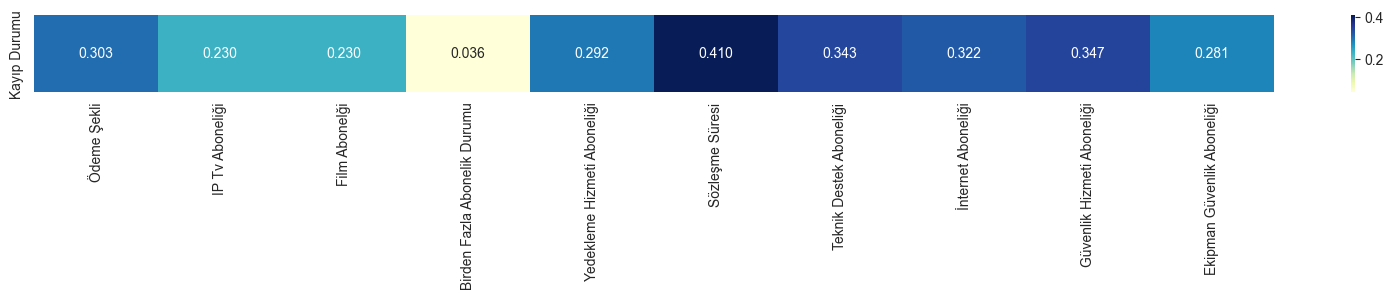

In [26]:
printmd("**Cramers V Heatmap on Polytomous Features and Target: Churn**")
cramers_v_val = pd.DataFrame(index=['Kayıp Durumu'], columns=polytomous_cols)

for j in range(0,len(polytomous_cols)):
    u = cramers_v(df['Kayıp Durumu'], df[polytomous_cols[j]])
    cramers_v_val.loc[:,polytomous_cols[j]] = u

cramers_v_val.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(cramers_v_val,annot=True,fmt='.3f', cmap="YlGnBu")
plt.show()

## Using Scipy Module

In [27]:
crosstab = pd.crosstab(df['Güvenlik Hizmeti Aboneliği'], df['Kayıp Durumu'])
display(crosstab)
printmd(f"Association between OnlineSecurity and Target:Churn **{stats.contingency.association(crosstab, method='cramer')}**")

Kayıp Durumu,Var,Yok
Güvenlik Hizmeti Aboneliği,,
Internet Hizmeti Yok,113,1413
Var,295,1724
Yok,1461,2037


Association between OnlineSecurity and Target:Churn **0.3474004326740552**

# 5.3 Uncertainty Coefficient


AKA Theil’s U - an asymmetric measure of association between categorical features

It is is based on the conditional entropy between x and y — or in human language, given the value of x, how many possible states does y have, and how often do they occur.

Formaly marked as U(x|y); Just like Cramer’s V, the output value is on the range of [0,1], where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x's value

Unlike Cramer’s V, it is asymmetric

So we will not lose any valuable information unlike symmetric tests

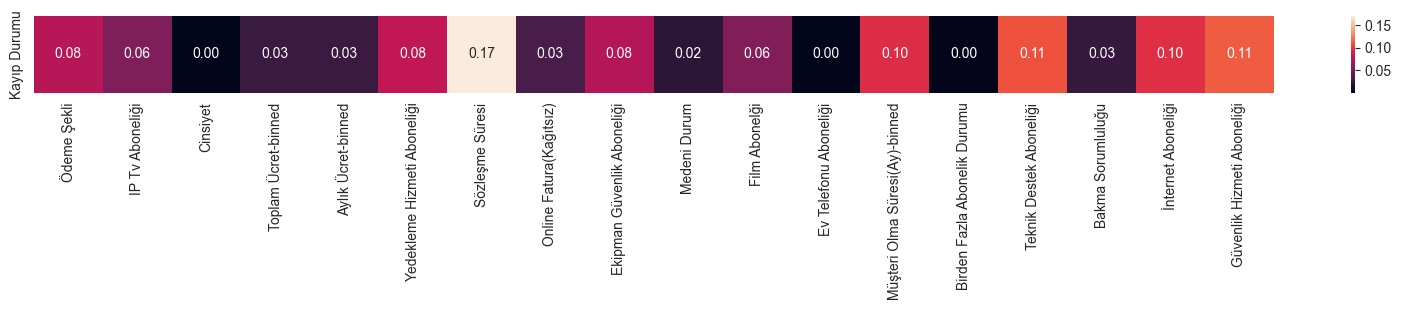

**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**

In [28]:
theilu = pd.DataFrame(index=['Kayıp Durumu'], columns=cat_cols)

for j in range(0,len(cat_cols)):
    u = theil_u(df['Kayıp Durumu'].tolist(),df[cat_cols[j]].tolist())
    theilu.loc[:,cat_cols[j]] = u

theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

printmd("**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**")

# 6. Collinearity

For categorical variables, multicollinearity can be detected with Spearman rank correlation coefficient (ordinal variables) and chi-square test (nominal variables)

Spearman's ρ was already performed in a previous section that can be used as a collinearity measure

That's why let's just proceed with chi-square here -

## 6.1 Chi-Square

In [29]:
calculate_chi_square('Ödeme Şekli','Birden Fazla Abonelik Durumu')

Correlation between **Ödeme Şekli** and **Birden Fazla Abonelik Durumu**

p-value : 1.1367151062831697e-81, degree of freedom: 6
probability=0.950, critical=12.592, stat=392.514
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



In [30]:
calculate_chi_square('Ödeme Şekli','Ev Telefonu Aboneliği')

Correlation between **Ödeme Şekli** and **Ev Telefonu Aboneliği**

p-value : 0.8621473788722152, degree of freedom: 3
probability=0.950, critical=7.815, stat=0.747
Independent (fail to reject H0)
significance=0.050, p=0.862
Independent (fail to reject H0)
-----------------------------------



In [31]:
calculate_chi_square('Ödeme Şekli','Sözleşme Süresi')

Correlation between **Ödeme Şekli** and **Sözleşme Süresi**

p-value : 4.067638353787387e-213, degree of freedom: 6
probability=0.950, critical=12.592, stat=1001.582
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------

